### Importing Python libraries

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Gene dvine linear regression 

In [3]:
df_simulations_results_1 = pd.read_csv("gene_dvine_results_1.csv")
df_simulations_results_2 = pd.read_csv("gene_dvine_results_2.csv")
df_simulations_results_3 = pd.read_csv("gene_dvine_results_3.csv")
df_simulations_results_4 = pd.read_csv("gene_dvine_results_4.csv")
df_simulations_results_5 = pd.read_csv("gene_dvine_results_5.csv")

In [4]:
df_simulations_results_1_vineknockoffs = pd.read_csv("gene_dvine_results_1_vineknockoffs.csv")
df_simulations_results_2_vineknockoffs = pd.read_csv("gene_dvine_results_2_vineknockoffs.csv")
df_simulations_results_3_vineknockoffs = pd.read_csv("gene_dvine_results_3_vineknockoffs.csv")
df_simulations_results_4_vineknockoffs = pd.read_csv("gene_dvine_results_4_vineknockoffs.csv")
df_simulations_results_5_vineknockoffs = pd.read_csv("gene_dvine_results_5_vineknockoffs.csv")


In [5]:
selected_columns_df2 = ['Vineknockoffs Power(%)', 'Vineknockoffs FDP(%)']

df_simulations_results_1 = pd.merge(df_simulations_results_1, df_simulations_results_1_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_results_2 = pd.merge(df_simulations_results_2, df_simulations_results_2_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_results_3 = pd.merge(df_simulations_results_3, df_simulations_results_3_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_results_4 = pd.merge(df_simulations_results_4, df_simulations_results_4_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_results_5 = pd.merge(df_simulations_results_5, df_simulations_results_5_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')


In [6]:
#Data frame with all the scenarios
df_simulations_results = pd.concat([df_simulations_results_1,df_simulations_results_2,df_simulations_results_3,df_simulations_results_4,df_simulations_results_5], axis=0)
df_simulations_results.reset_index(drop=True, inplace=True)
df_simulations_results

,Unnamed: 0,Varying feature,Gaussian Power(%),2do Order Power(%),Dvine Power(%),Nonpar DvinePower(%),Gaussian FDP(%),2do Order FDP(%),Dvine FDP(%),Nonpar Dvine FDP(%),Vineknockoffs Power(%),Vineknockoffs FDP(%)
0,0,100,95.0,0.0,95.0,95.0,10.0,0.0,24.0,24.0,95.0,5.0
1,1,100,85.0,85.0,90.0,90.0,0.0,0.0,14.0,10.0,90.0,5.0
2,2,100,95.0,95.0,100.0,100.0,0.0,0.0,9.0,17.0,100.0,13.0
3,3,100,90.0,90.0,90.0,90.0,5.0,5.0,14.0,10.0,100.0,5.0
4,4,100,75.0,70.0,90.0,90.0,6.0,7.0,25.0,25.0,85.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,95,200,90.0,0.0,87.5,85.0,8.0,0.0,10.0,11.0,100.0,9.0
496,96,200,70.0,57.5,77.5,77.5,0.0,0.0,6.0,6.0,80.0,6.0
497,97,200,65.0,50.0,85.0,67.5,0.0,0.0,19.0,7.0,75.0,14.0
498,98,200,82.5,82.5,90.0,90.0,3.0,3.0,18.0,10.0,80.0,9.0


### Dataframe with the mean results 

In [7]:
results = df_simulations_results[["Varying feature","Gaussian Power(%)","2do Order Power(%)", "Dvine Power(%)", "Nonpar DvinePower(%)", "Vineknockoffs Power(%)" ,"Gaussian FDP(%)", "2do Order FDP(%)","Dvine FDP(%)","Nonpar Dvine FDP(%)","Vineknockoffs FDP(%)"]].groupby("Varying feature").mean()
results



,Gaussian Power(%),2do Order Power(%),Dvine Power(%),Nonpar DvinePower(%),Vineknockoffs Power(%),Gaussian FDP(%),2do Order FDP(%),Dvine FDP(%),Nonpar Dvine FDP(%),Vineknockoffs FDP(%)
Varying feature,,,,,,,,,,
100,89.650000,77.350000,93.300000,92.700000,93.500000,4.42,1.92,15.01,14.56,11.84
125,90.280000,70.520000,92.840000,92.560000,91.160000,5.21,2.06,13.00,12.65,10.45
150,86.500000,57.633333,91.966667,90.966667,89.566667,5.58,1.84,15.51,14.18,11.54
175,82.685714,50.342857,89.828571,88.542857,87.542857,4.31,0.71,14.66,13.73,11.81
200,77.925000,30.225000,86.925000,84.750000,83.775000,4.23,0.44,14.87,13.21,11.52


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_3484005/492991853.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


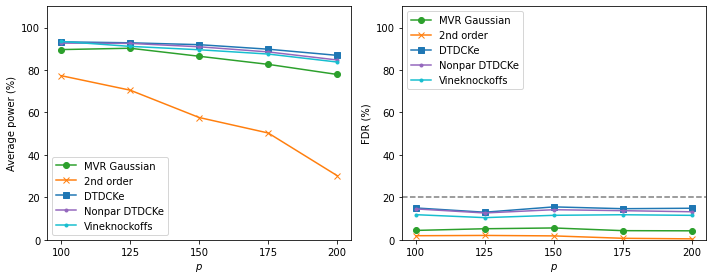

In [26]:
#Average power and FDR plots side-by-side

x_points = np.array(results.index)

fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Varying the number of predictors (p)',fontsize=18)
fig.set_figwidth(10)
fig.set_figheight(4)

y1_points = np.array(results["Gaussian Power(%)"])
y2_points = np.array(results["2do Order Power(%)"])
y3_points = np.array(results["Dvine Power(%)"])
y4_points = np.array(results["Nonpar DvinePower(%)"])
y5_points = np.array(results["Vineknockoffs Power(%)"])


ax1.plot(x_points, y1_points, marker = 'o',color='tab:green',label="MVR Gaussian")
ax1.plot(x_points, y2_points, marker = 'x', color='tab:orange', label="2nd order")
ax1.plot(x_points, y3_points, marker = 's', color='tab:blue', label="DTDCKe")
ax1.plot(x_points, y4_points, marker = '.', color='tab:purple',label="Nonpar DTDCKe")
ax1.plot(x_points, y5_points, marker = '.', color='tab:cyan',label="Vineknockoffs")


ax1.set_ylim(0, 110)
ax1.set_xticks(x_points)
ax1.legend(loc="lower left")
ax1.set_xlabel("$p$")
ax1.set_ylabel("Average power (%)")


y1_points = np.array(results["Gaussian FDP(%)"])
y2_points = np.array(results["2do Order FDP(%)"])
y3_points = np.array(results["Dvine FDP(%)"])
y4_points = np.array(results["Nonpar Dvine FDP(%)"])
y5_points = np.array(results["Vineknockoffs FDP(%)"])


ax2.plot(x_points, y1_points, marker = 'o',color='tab:green',label="MVR Gaussian")
ax2.plot(x_points, y2_points, marker = 'x', color='tab:orange', label="2nd order")
ax2.plot(x_points, y3_points, marker = 's', color='tab:blue', label="DTDCKe")
ax2.plot(x_points, y4_points, marker = '.', color='tab:purple',label="Nonpar DTDCKe")
ax2.plot(x_points, y5_points, marker = '.', color='tab:cyan',label="Vineknockoffs")


ax2.axhline(y=20, color='tab:gray', linestyle='dashed')
ax2.set_ylim(0, 110)
ax2.set_xticks(x_points)
ax2.legend(loc="upper left")
ax2.set_xlabel("$p$")
ax2.set_ylabel("FDR (%)")

fig.tight_layout()

fig.savefig("gene_dvine_linear_regression_14may24.eps", format="eps", dpi=1200)
fig.savefig("gene_dvine_linear_regression_14may24.jpg", format="jpg", dpi=300)

fig.show()

### Gene dvine logistic regression 

In [16]:
df_simulations_classification_results_1 = pd.read_csv("gene_dvine_classification_results_1.csv")
df_simulations_classification_results_2 = pd.read_csv("gene_dvine_classification_results_2.csv")
df_simulations_classification_results_3 = pd.read_csv("gene_dvine_classification_results_3.csv")
df_simulations_classification_results_4 = pd.read_csv("gene_dvine_classification_results_4.csv")
df_simulations_classification_results_5 = pd.read_csv("gene_dvine_classification_results_5.csv")

In [17]:
df_simulations_classification_results_1_vineknockoffs = pd.read_csv("gene_dvine_classification_results_1_vineknockoffs.csv")
df_simulations_classification_results_2_vineknockoffs = pd.read_csv("gene_dvine_classification_results_2_vineknockoffs.csv")
df_simulations_classification_results_3_vineknockoffs = pd.read_csv("gene_dvine_classification_results_3_vineknockoffs.csv")
df_simulations_classification_results_4_vineknockoffs = pd.read_csv("gene_dvine_classification_results_4_vineknockoffs.csv")
df_simulations_classification_results_5_vineknockoffs = pd.read_csv("gene_dvine_classification_results_5_vineknockoffs.csv")

In [18]:
selected_columns_df2 = ['Vineknockoffs Power(%)', 'Vineknockoffs FDP(%)']

df_simulations_classification_results_1 = pd.merge(df_simulations_classification_results_1, df_simulations_classification_results_1_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_classification_results_2 = pd.merge(df_simulations_classification_results_2, df_simulations_classification_results_2_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_classification_results_3 = pd.merge(df_simulations_classification_results_3, df_simulations_classification_results_3_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_classification_results_4 = pd.merge(df_simulations_classification_results_4, df_simulations_classification_results_4_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')
df_simulations_classification_results_5 = pd.merge(df_simulations_classification_results_5, df_simulations_classification_results_5_vineknockoffs[selected_columns_df2 + ['Unnamed: 0']], on='Unnamed: 0', how='left')


In [19]:
#Data frame with all the scenarios
df_simulations_classification_results = pd.concat([df_simulations_classification_results_1, df_simulations_classification_results_2, df_simulations_classification_results_3, df_simulations_classification_results_4, df_simulations_classification_results_5], axis=0)
df_simulations_classification_results.reset_index(drop=True, inplace=True)
df_simulations_classification_results

,Unnamed: 0,Varying feature,Success rate,Gaussian Power(%),2do Order Power(%),Dvine Power(%),Nonpar DvinePower(%),Gaussian FDP(%),2do Order FDP(%),Dvine FDP(%),Nonpar Dvine FDP(%),Vineknockoffs Power(%),Vineknockoffs FDP(%)
0,0,100,0.5750,75.0,0.0,85.0,85.0,12.0,0.0,19.0,19.0,85.0,15.0
1,1,100,0.4000,90.0,80.0,90.0,90.0,14.0,0.0,14.0,14.0,85.0,6.0
2,2,100,0.4700,100.0,100.0,100.0,100.0,0.0,0.0,5.0,5.0,90.0,5.0
3,3,100,0.4325,65.0,65.0,70.0,65.0,0.0,0.0,7.0,0.0,100.0,23.0
4,4,100,0.4450,100.0,95.0,100.0,100.0,9.0,5.0,9.0,9.0,100.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,95,200,0.6750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.5,21.0
496,96,200,0.4925,0.0,0.0,30.0,32.5,0.0,0.0,20.0,19.0,50.0,0.0
497,97,200,0.4800,32.5,0.0,62.5,57.5,0.0,0.0,11.0,12.0,30.0,14.0
498,98,200,0.3625,0.0,0.0,37.5,30.0,0.0,0.0,17.0,20.0,45.0,14.0


### Dataframe with the mean results 

In [20]:
classification_results = df_simulations_classification_results[["Varying feature","Gaussian Power(%)","2do Order Power(%)", "Dvine Power(%)", "Nonpar DvinePower(%)", "Vineknockoffs Power(%)" ,"Gaussian FDP(%)", "2do Order FDP(%)","Dvine FDP(%)","Nonpar Dvine FDP(%)","Vineknockoffs FDP(%)"]].groupby("Varying feature").mean()
classification_results

,Gaussian Power(%),2do Order Power(%),Dvine Power(%),Nonpar DvinePower(%),Vineknockoffs Power(%),Gaussian FDP(%),2do Order FDP(%),Dvine FDP(%),Nonpar Dvine FDP(%),Vineknockoffs FDP(%)
Varying feature,,,,,,,,,,
100,85.300000,73.050000,91.350000,90.150000,89.500000,5.30,2.66,12.96,13.06,10.48
125,77.000000,60.875000,87.375000,85.041667,83.833333,4.92,2.21,15.52,14.26,11.46
150,58.233333,32.366667,75.966667,72.833333,69.100000,3.71,1.03,14.66,14.44,11.32
175,37.147059,14.941176,66.117647,62.294118,61.117647,1.85,0.25,15.07,14.03,10.41
200,13.375000,0.850000,51.275000,47.950000,41.775000,1.31,0.00,15.83,15.88,10.16


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/tmp/ipykernel_3484005/1031293841.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


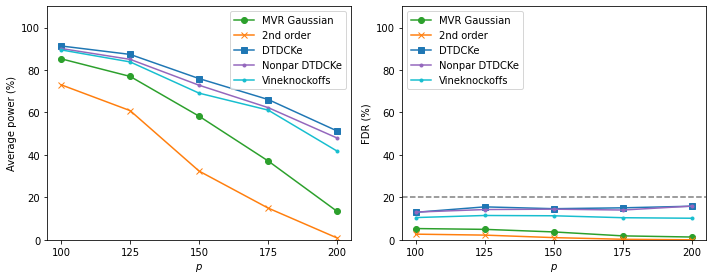

In [25]:
#Average power and FDR plots side-by-side

x_points = np.array(classification_results.index)

fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Varying the number of predictors (p)',fontsize=18)
fig.set_figwidth(10)
fig.set_figheight(4)

y1_points = np.array(classification_results["Gaussian Power(%)"])
y2_points = np.array(classification_results["2do Order Power(%)"])
y3_points = np.array(classification_results["Dvine Power(%)"])
y4_points = np.array(classification_results["Nonpar DvinePower(%)"])
y5_points = np.array(classification_results["Vineknockoffs Power(%)"])


ax1.plot(x_points, y1_points, marker = 'o',color='tab:green',label="MVR Gaussian")
ax1.plot(x_points, y2_points, marker = 'x', color='tab:orange', label="2nd order")
ax1.plot(x_points, y3_points, marker = 's', color='tab:blue', label="DTDCKe")
ax1.plot(x_points, y4_points, marker = '.', color='tab:purple',label="Nonpar DTDCKe")
ax1.plot(x_points, y5_points, marker = '.', color='tab:cyan',label="Vineknockoffs")


ax1.set_ylim(0, 110)
ax1.set_xticks(x_points)
ax1.legend(loc="upper right")
ax1.set_xlabel("$p$")
ax1.set_ylabel("Average power (%)")


y1_points = np.array(classification_results["Gaussian FDP(%)"])
y2_points = np.array(classification_results["2do Order FDP(%)"])
y3_points = np.array(classification_results["Dvine FDP(%)"])
y4_points = np.array(classification_results["Nonpar Dvine FDP(%)"])
y5_points = np.array(classification_results["Vineknockoffs FDP(%)"])

ax2.plot(x_points, y1_points, marker = 'o',color='tab:green',label="MVR Gaussian")
ax2.plot(x_points, y2_points, marker = 'x', color='tab:orange', label="2nd order")
ax2.plot(x_points, y3_points, marker = 's', color='tab:blue', label="DTDCKe")
ax2.plot(x_points, y4_points, marker = '.', color='tab:purple',label="Nonpar DTDCKe")
ax2.plot(x_points, y5_points, marker = '.', color='tab:cyan',label="Vineknockoffs")

ax2.axhline(y=20, color='tab:gray', linestyle='dashed')
ax2.set_ylim(0, 110)
ax2.set_xticks(x_points)
ax2.legend(loc="upper left")
ax2.set_xlabel("$p$")
ax2.set_ylabel("FDR (%)")

fig.tight_layout()

fig.savefig("gene_dvine_logistic_regression_14may24.eps", format="eps", dpi=1200)
fig.savefig("gene_dvine_logistic_regression_14may24.jpg", format="jpg", dpi=300)

fig.show()